In [23]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline


In [24]:
train_set=pd.read_csv('songs-train.csv')
test_set=pd.read_csv('songs-test.csv')

In [25]:
train_set.head()

,danceability,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,popular
0,0.391,8,-9.532,0.478,0.000006,0.1160,0.138,105.593,0.0
1,0.628,1,-13.834,0.156,0.010400,0.0836,0.761,102.974,0.0
2,0.613,3,-22.789,0.864,0.000000,0.2690,0.371,75.104,0.0
3,0.504,2,-5.931,0.414,0.000000,0.0845,0.163,135.927,1.0
4,0.698,9,-3.840,0.101,0.000000,0.1070,0.931,124.042,1.0


In [26]:
m=train_set.shape[0]
m

20000

In [27]:
X=train_set.iloc[:20000,:-1].values
X.shape

(20000, 8)

In [28]:
y=train_set.iloc[:20000,-1].values
y=y.reshape(20000,1)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [29]:
### here z is (theta tranpose * x) and z is the linear regression prediction. We are giving z as a i/p to sigmoid function 
### to calculate the posetior probabilty.
def sigmoid(z):
    denom = 1+np.e**(-z)
    return 1/denom

In [30]:
def cost_function(theta, X, y):
    
#     print('Theta--->',theta)
#     print('X--->',X)
#     print('y--->',y)
#     print('theta tranpose * x--->',np.dot(X,theta))
    
    h_theta_x = sigmoid(np.dot(X,theta))
#    print('Posterior(y^)--->',h_theta_x)
    
    
    term1 = (0-y)*np.log(h_theta_x)
    term2 = (1-y)*np.log(1-h_theta_x)
    print('term1-term2--->',term1-term2)
    
    J = (np.sum(term1-term2))/m
    
    grad = np.dot(np.transpose(h_theta_x - y),X)
    grad = grad/m
    
    return (J, grad)

In [31]:
x_0 = np.ones(X.shape[0]).reshape(X.shape[0],1)
x_0

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [32]:
X2 = np.concatenate((x_0, X), axis=1)
X2.shape

(20000, 9)

In [33]:
X2

array([[1.00000e+00, 3.91000e-01, 8.00000e+00, ..., 1.16000e-01,
        1.38000e-01, 1.05593e+02],
       [1.00000e+00, 6.28000e-01, 1.00000e+00, ..., 8.36000e-02,
        7.61000e-01, 1.02974e+02],
       [1.00000e+00, 6.13000e-01, 3.00000e+00, ..., 2.69000e-01,
        3.71000e-01, 7.51040e+01],
       ...,
       [1.00000e+00, 6.71000e-01, 8.00000e+00, ..., 1.19000e-01,
        4.92000e-01, 1.04401e+02],
       [1.00000e+00, 6.48000e-01, 1.00000e+01, ..., 1.22000e-01,
        4.34000e-01, 1.41417e+02],
       [1.00000e+00, 8.53000e-01, 1.00000e+01, ..., 4.15000e-02,
        9.48000e-01, 1.25010e+02]])

In [34]:
initial_theta = np.zeros(X.shape[1]+1).reshape(X.shape[1]+1,1)
initial_theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [35]:
initial_theta.shape

(9, 1)

In [36]:
X2.shape

(20000, 9)

In [37]:

(J, grad) = cost_function(initial_theta, X2, y)
print(f'Cost at initial theta: {J}')
print(f'Gradient at inital theta: {grad.flatten()}')

term1-term2---> [[0.69314718]
 [0.69314718]
 [0.69314718]
 ...
 [0.69314718]
 [0.69314718]
 [0.69314718]]
Cost at initial theta: 0.6931471805599453
Gradient at inital theta: [ 0.         -0.02031596 -0.051975   -1.40053213  0.08847743  0.02479302
  0.00309491 -0.00826459 -1.87713683]


In [38]:
costHistory=[]
thetaHistory=[]
def gradient_descent(X, y, theta=initial_theta,
                    alpha=10, num_iterations=5000):
    #print('before loop-->',theta)
    for i in range(num_iterations):
        totalCost,grad=cost_function(theta,X,y)
#         print('theta in loop before subtraction----',theta)
#         print('alpha*grad before subtraction----',alpha*grad)
        theta=theta-((alpha*grad)/y.shape[0]).reshape(theta.shape[0],1)
        #print('theta in gradient descent method----',theta)
        costHistory.append(totalCost)
        thetaHistory.append(theta)
        
    return costHistory,thetaHistory,theta  

In [39]:
CH,TH,thetaFinal=gradient_descent(X2,y,initial_theta)

term1-term2---> [[0.69314718]
 [0.69314718]
 [0.69314718]
 ...
 [0.69314718]
 [0.69314718]
 [0.69314718]]
term1-term2---> [[0.74053038]
 [0.73758728]
 [0.72080897]
 ...
 [0.64719409]
 [0.75830946]
 [0.63784448]]
term1-term2---> [[0.69770877]
 [0.69421249]
 [0.68426773]
 ...
 [0.68592246]
 [0.70178908]
 [0.68328976]]
term1-term2---> [[0.7336092 ]
 [0.72736969]
 [0.70355256]
 ...
 [0.65081727]
 [0.75156819]
 [0.64097541]]
term1-term2---> [[0.70087226]
 [0.6939288 ]
 [0.67457071]
 ...
 [0.68014169]
 [0.70857182]
 [0.67519629]]
term1-term2---> [[0.72803402]
 [0.71853295]
 [0.68758594]
 ...
 [0.65328435]
 [0.74661478]
 [0.64274227]]
term1-term2---> [[0.70297053]
 [0.69263135]
 [0.66432225]
 ...
 [0.67544779]
 [0.71392496]
 [0.66843008]]
term1-term2---> [[0.72347542]
 [0.71074667]
 [0.67264807]
 ...
 [0.65487016]
 [0.7430053 ]
 [0.64347271]]
term1-term2---> [[0.70425692]
 [0.69057414]
 [0.65372047]
 ...
 [0.67157706]
 [0.71817815]
 [0.66266986]]
term1-term2---> [[0.71968899]
 [0.70376606]
 [

term1-term2---> [[0.6291709 ]
 [0.43838272]
 [0.16481387]
 ...
 [0.58230736]
 [0.77364665]
 [0.49454408]]
term1-term2---> [[0.62884593]
 [0.43746276]
 [0.16378138]
 ...
 [0.58198585]
 [0.77383072]
 [0.49395206]]
term1-term2---> [[0.62852209]
 [0.43654675]
 [0.16275784]
 ...
 [0.58166538]
 [0.77401429]
 [0.49336226]]
term1-term2---> [[0.62819938]
 [0.43563466]
 [0.16174315]
 ...
 [0.58134593]
 [0.77419737]
 [0.49277466]]
term1-term2---> [[0.62787779]
 [0.43472646]
 [0.16073721]
 ...
 [0.58102751]
 [0.77437997]
 [0.49218924]]
term1-term2---> [[0.62755731]
 [0.43382213]
 [0.15973994]
 ...
 [0.58071009]
 [0.77456209]
 [0.49160599]]
term1-term2---> [[0.62723794]
 [0.43292164]
 [0.15875124]
 ...
 [0.58039369]
 [0.77474372]
 [0.49102491]]
term1-term2---> [[0.62691968]
 [0.43202499]
 [0.15777103]
 ...
 [0.5800783 ]
 [0.77492488]
 [0.49044596]]
term1-term2---> [[0.62660251]
 [0.43113213]
 [0.15679921]
 ...
 [0.57976389]
 [0.77510556]
 [0.48986915]]
term1-term2---> [[0.62628643]
 [0.43024305]
 [

term1-term2---> [[0.59077988]
 [0.33467798]
 [0.07465138]
 ...
 [0.54327366]
 [0.79696846]
 [0.42512785]]
term1-term2---> [[0.590577  ]
 [0.33415537]
 [0.07431781]
 ...
 [0.54305872]
 [0.79710393]
 [0.42476039]]
term1-term2---> [[0.59037469]
 [0.33363452]
 [0.07398643]
 ...
 [0.54284428]
 [0.79723919]
 [0.42439395]]
term1-term2---> [[0.59017297]
 [0.33311542]
 [0.07365722]
 ...
 [0.54263032]
 [0.79737423]
 [0.42402851]]
term1-term2---> [[0.58997183]
 [0.33259806]
 [0.07333017]
 ...
 [0.54241685]
 [0.79750906]
 [0.42366408]]
term1-term2---> [[0.58977127]
 [0.33208243]
 [0.07300524]
 ...
 [0.54220387]
 [0.79764369]
 [0.42330064]]
term1-term2---> [[0.58957129]
 [0.33156853]
 [0.07268244]
 ...
 [0.54199136]
 [0.7977781 ]
 [0.4229382 ]]
term1-term2---> [[0.58937188]
 [0.33105634]
 [0.07236173]
 ...
 [0.54177934]
 [0.79791231]
 [0.42257674]]
term1-term2---> [[0.58917304]
 [0.33054586]
 [0.07204311]
 ...
 [0.5415678 ]
 [0.79804631]
 [0.42221627]]
term1-term2---> [[0.58897476]
 [0.33003708]
 [

term1-term2---> [[0.56202065]
 [0.26294726]
 [0.03802063]
 ...
 [0.51110574]
 [0.81851932]
 [0.37213582]]
term1-term2---> [[0.56189451]
 [0.26264219]
 [0.03790047]
 ...
 [0.51095492]
 [0.81862739]
 [0.37189716]]
term1-term2---> [[0.56176867]
 [0.26233793]
 [0.0377809 ]
 ...
 [0.51080435]
 [0.81873534]
 [0.37165901]]
term1-term2---> [[0.56164315]
 [0.26203449]
 [0.03766193]
 ...
 [0.51065405]
 [0.81884319]
 [0.37142137]]
term1-term2---> [[0.56151793]
 [0.26173187]
 [0.03754354]
 ...
 [0.510504  ]
 [0.81895092]
 [0.37118423]]
term1-term2---> [[0.56139302]
 [0.26143006]
 [0.03742573]
 ...
 [0.51035422]
 [0.81905854]
 [0.37094759]]
term1-term2---> [[0.56126841]
 [0.26112905]
 [0.0373085 ]
 ...
 [0.51020469]
 [0.81916605]
 [0.37071146]]
term1-term2---> [[0.56114411]
 [0.26082886]
 [0.03719185]
 ...
 [0.51005542]
 [0.81927344]
 [0.37047582]]
term1-term2---> [[0.56102011]
 [0.26052947]
 [0.03707576]
 ...
 [0.50990641]
 [0.81938073]
 [0.37024068]]
term1-term2---> [[0.56089641]
 [0.26023087]
 [

term1-term2---> [[0.54250406]
 [0.21651388]
 [0.0226285 ]
 ...
 [0.48620966]
 [0.83746935]
 [0.33402511]]
term1-term2---> [[0.54242288]
 [0.21632338]
 [0.02257647]
 ...
 [0.48609816]
 [0.83755971]
 [0.33386026]]
term1-term2---> [[0.54234187]
 [0.21613331]
 [0.02252465]
 ...
 [0.48598681]
 [0.83764999]
 [0.33369569]]
term1-term2---> [[0.54226103]
 [0.21594367]
 [0.02247302]
 ...
 [0.48587563]
 [0.8377402 ]
 [0.33353141]]
term1-term2---> [[0.54218037]
 [0.21575444]
 [0.02242159]
 ...
 [0.4857646 ]
 [0.83783032]
 [0.33336742]]
term1-term2---> [[0.54209989]
 [0.21556564]
 [0.02237036]
 ...
 [0.48565374]
 [0.83792038]
 [0.33320372]]
term1-term2---> [[0.54201957]
 [0.21537726]
 [0.02231933]
 ...
 [0.48554303]
 [0.83801035]
 [0.3330403 ]]
term1-term2---> [[0.54193943]
 [0.2151893 ]
 [0.02226849]
 ...
 [0.48543249]
 [0.83810025]
 [0.33287717]]
term1-term2---> [[0.54185946]
 [0.21500176]
 [0.02221784]
 ...
 [0.4853221 ]
 [0.83819007]
 [0.33271433]]
term1-term2---> [[0.54177966]
 [0.21481464]
 [

term1-term2---> [[0.53157222]
 [0.19096527]
 [0.01636629]
 ...
 [0.47037891]
 [0.85085561]
 [0.31113902]]
term1-term2---> [[0.53151362]
 [0.19082862]
 [0.01633649]
 ...
 [0.47028901]
 [0.850935  ]
 [0.31101202]]
term1-term2---> [[0.53145514]
 [0.19069223]
 [0.01630679]
 ...
 [0.47019922]
 [0.85101432]
 [0.31088521]]
term1-term2---> [[0.53139678]
 [0.19055612]
 [0.01627718]
 ...
 [0.47010955]
 [0.85109358]
 [0.31075861]]
term1-term2---> [[0.53133853]
 [0.19042027]
 [0.01624767]
 ...
 [0.47002   ]
 [0.85117278]
 [0.3106322 ]]
term1-term2---> [[0.53128039]
 [0.1902847 ]
 [0.01621826]
 ...
 [0.46993056]
 [0.85125191]
 [0.31050598]]
term1-term2---> [[0.53122237]
 [0.19014939]
 [0.01618894]
 ...
 [0.46984124]
 [0.85133098]
 [0.31037997]]
term1-term2---> [[0.53116447]
 [0.19001434]
 [0.01615971]
 ...
 [0.46975204]
 [0.85140999]
 [0.31025414]]
term1-term2---> [[0.53110668]
 [0.18987956]
 [0.01613058]
 ...
 [0.46966294]
 [0.85148893]
 [0.31012852]]
term1-term2---> [[0.531049  ]
 [0.18974505]
 [

term1-term2---> [[0.52411229]
 [0.17354258]
 [0.0128599 ]
 ...
 [0.45838552]
 [0.86181082]
 [0.29448728]]
term1-term2---> [[0.52406797]
 [0.17343876]
 [0.01284071]
 ...
 [0.4583106 ]
 [0.86188166]
 [0.29438508]]
term1-term2---> [[0.52402374]
 [0.17333512]
 [0.01282158]
 ...
 [0.45823576]
 [0.86195243]
 [0.29428303]]
term1-term2---> [[0.52397958]
 [0.17323167]
 [0.0128025 ]
 ...
 [0.45816102]
 [0.86202316]
 [0.29418112]]
term1-term2---> [[0.5239355 ]
 [0.1731284 ]
 [0.01278348]
 ...
 [0.45808637]
 [0.86209383]
 [0.29407935]]
term1-term2---> [[0.52389151]
 [0.17302531]
 [0.01276451]
 ...
 [0.4580118 ]
 [0.86216444]
 [0.29397773]]
term1-term2---> [[0.5238476 ]
 [0.17292241]
 [0.01274559]
 ...
 [0.45793733]
 [0.862235  ]
 [0.29387625]]
term1-term2---> [[0.52380377]
 [0.1728197 ]
 [0.01272672]
 ...
 [0.45786294]
 [0.86230551]
 [0.29377492]]
term1-term2---> [[0.52376002]
 [0.17271717]
 [0.01270791]
 ...
 [0.45778865]
 [0.86237596]
 [0.29367373]]
term1-term2---> [[0.52371635]
 [0.17261482]
 [

term1-term2---> [[0.5175546 ]
 [0.15808968]
 [0.0102129 ]
 ...
 [0.44671384]
 [0.87323025]
 [0.27883207]]
term1-term2---> [[0.517522  ]
 [0.15801226]
 [0.01020066]
 ...
 [0.44665252]
 [0.87329237]
 [0.27875122]]
term1-term2---> [[0.51748945]
 [0.15793496]
 [0.01018845]
 ...
 [0.44659128]
 [0.87335443]
 [0.27867047]]
term1-term2---> [[0.51745697]
 [0.15785778]
 [0.01017627]
 ...
 [0.4465301 ]
 [0.87341645]
 [0.27858983]]
term1-term2---> [[0.51742454]
 [0.15778073]
 [0.01016412]
 ...
 [0.44646899]
 [0.87347842]
 [0.27850929]]
term1-term2---> [[0.51739216]
 [0.1577038 ]
 [0.010152  ]
 ...
 [0.44640795]
 [0.87354034]
 [0.27842886]]
term1-term2---> [[0.51735984]
 [0.157627  ]
 [0.01013991]
 ...
 [0.44634699]
 [0.87360222]
 [0.27834853]]
term1-term2---> [[0.51732757]
 [0.15755032]
 [0.01012785]
 ...
 [0.44628608]
 [0.87366405]
 [0.27826831]]
term1-term2---> [[0.51729536]
 [0.15747377]
 [0.01011582]
 ...
 [0.44622525]
 [0.87372583]
 [0.27818819]]
term1-term2---> [[0.51726321]
 [0.15739734]
 [

term1-term2---> [[0.51206081]
 [0.14490807]
 [0.00826786]
 ...
 [0.43580738]
 [0.8846546 ]
 [0.26466864]]
term1-term2---> [[0.51203735]
 [0.14485109]
 [0.00826004]
 ...
 [0.43575805]
 [0.88470806]
 [0.26460554]]
term1-term2---> [[0.51201393]
 [0.14479419]
 [0.00825223]
 ...
 [0.43570876]
 [0.88476149]
 [0.26454252]]
term1-term2---> [[0.51199054]
 [0.14473738]
 [0.00824444]
 ...
 [0.43565954]
 [0.88481487]
 [0.26447957]]
term1-term2---> [[0.5119672 ]
 [0.14468065]
 [0.00823667]
 ...
 [0.43561036]
 [0.88486821]
 [0.2644167 ]]
term1-term2---> [[0.51194389]
 [0.144624  ]
 [0.00822892]
 ...
 [0.43556123]
 [0.88492151]
 [0.26435391]]
term1-term2---> [[0.51192061]
 [0.14456744]
 [0.00822118]
 ...
 [0.43551216]
 [0.88497477]
 [0.26429119]]
term1-term2---> [[0.51189738]
 [0.14451096]
 [0.00821346]
 ...
 [0.43546314]
 [0.885028  ]
 [0.26422855]]
term1-term2---> [[0.51187418]
 [0.14445456]
 [0.00820575]
 ...
 [0.43541418]
 [0.88508118]
 [0.26416598]]
term1-term2---> [[0.51185102]
 [0.14439825]
 [

term1-term2---> [[0.50843245]
 [0.13600135]
 [0.0071038 ]
 ...
 [0.42783844]
 [0.8935148 ]
 [0.25458296]]
term1-term2---> [[0.50841463]
 [0.13595708]
 [0.0070983 ]
 ...
 [0.42779747]
 [0.89356156]
 [0.25453164]]
term1-term2---> [[0.50839683]
 [0.13591287]
 [0.00709281]
 ...
 [0.42775654]
 [0.89360829]
 [0.25448037]]
term1-term2---> [[0.50837906]
 [0.13586872]
 [0.00708733]
 ...
 [0.42771565]
 [0.89365498]
 [0.25442917]]
term1-term2---> [[0.50836132]
 [0.13582463]
 [0.00708187]
 ...
 [0.42767481]
 [0.89370164]
 [0.25437802]]
term1-term2---> [[0.5083436 ]
 [0.1357806 ]
 [0.00707641]
 ...
 [0.427634  ]
 [0.89374826]
 [0.25432693]]
term1-term2---> [[0.50832591]
 [0.13573663]
 [0.00707096]
 ...
 [0.42759324]
 [0.89379484]
 [0.25427589]]
term1-term2---> [[0.50830824]
 [0.13569273]
 [0.00706552]
 ...
 [0.42755252]
 [0.89384139]
 [0.25422492]]
term1-term2---> [[0.50829061]
 [0.13564888]
 [0.0070601 ]
 ...
 [0.42751184]
 [0.89388791]
 [0.254174  ]]
term1-term2---> [[0.50827299]
 [0.1356051 ]
 [

term1-term2---> [[0.50569453]
 [0.12913182]
 [0.00628321]
 ...
 [0.42130335]
 [0.90114073]
 [0.24645996]]
term1-term2---> [[0.50568069]
 [0.12909674]
 [0.00627918]
 ...
 [0.42126902]
 [0.90118172]
 [0.24641761]]
term1-term2---> [[0.50566688]
 [0.1290617 ]
 [0.00627516]
 ...
 [0.42123472]
 [0.90122267]
 [0.2463753 ]]
term1-term2---> [[0.50565309]
 [0.12902671]
 [0.00627115]
 ...
 [0.42120046]
 [0.90126359]
 [0.24633303]]
term1-term2---> [[0.50563931]
 [0.12899177]
 [0.00626715]
 ...
 [0.42116623]
 [0.90130448]
 [0.24629081]]
term1-term2---> [[0.50562556]
 [0.12895687]
 [0.00626315]
 ...
 [0.42113204]
 [0.90134534]
 [0.24624864]]
term1-term2---> [[0.50561182]
 [0.12892201]
 [0.00625916]
 ...
 [0.42109788]
 [0.90138617]
 [0.24620651]]
term1-term2---> [[0.5055981 ]
 [0.1288872 ]
 [0.00625517]
 ...
 [0.42106375]
 [0.90142697]
 [0.24616442]]
term1-term2---> [[0.5055844 ]
 [0.12885244]
 [0.0062512 ]
 ...
 [0.42102966]
 [0.90146773]
 [0.24612239]]
term1-term2---> [[0.50557073]
 [0.12881772]
 [

term1-term2---> [[0.50364127]
 [0.1238814 ]
 [0.00569887]
 ...
 [0.41604787]
 [0.90753492]
 [0.24000976]]
term1-term2---> [[0.50363025]
 [0.12385298]
 [0.0056958 ]
 ...
 [0.41601875]
 [0.90757105]
 [0.2399742 ]]
term1-term2---> [[0.50361924]
 [0.12382459]
 [0.00569274]
 ...
 [0.41598967]
 [0.90760715]
 [0.23993868]]
term1-term2---> [[0.50360824]
 [0.12379624]
 [0.00568969]
 ...
 [0.41596061]
 [0.90764322]
 [0.23990319]]
term1-term2---> [[0.50359726]
 [0.12376792]
 [0.00568663]
 ...
 [0.41593158]
 [0.90767926]
 [0.23986773]]
term1-term2---> [[0.5035863 ]
 [0.12373964]
 [0.00568359]
 ...
 [0.41590257]
 [0.90771528]
 [0.23983232]]
term1-term2---> [[0.50357535]
 [0.1237114 ]
 [0.00568055]
 ...
 [0.4158736 ]
 [0.90775127]
 [0.23979694]]
term1-term2---> [[0.50356441]
 [0.12368318]
 [0.00567751]
 ...
 [0.41584465]
 [0.90778723]
 [0.2397616 ]]
term1-term2---> [[0.50355349]
 [0.12365501]
 [0.00567448]
 ...
 [0.41581574]
 [0.90782316]
 [0.23972629]]
term1-term2---> [[0.50354258]
 [0.12362687]
 [

term1-term2---> [[0.50210161]
 [0.11988983]
 [0.00527823]
 ...
 [0.41188322]
 [0.9127865 ]
 [0.23493881]]
term1-term2---> [[0.50209256]
 [0.11986626]
 [0.0052758 ]
 ...
 [0.41185817]
 [0.91281863]
 [0.23490839]]
term1-term2---> [[0.50208353]
 [0.11984273]
 [0.00527338]
 ...
 [0.41183314]
 [0.91285073]
 [0.234878  ]]
term1-term2---> [[0.5020745 ]
 [0.11981922]
 [0.00527097]
 ...
 [0.41180813]
 [0.91288281]
 [0.23484763]]
term1-term2---> [[0.50206549]
 [0.11979573]
 [0.00526855]
 ...
 [0.41178315]
 [0.91291486]
 [0.2348173 ]]
term1-term2---> [[0.50205649]
 [0.11977228]
 [0.00526614]
 ...
 [0.41175819]
 [0.91294689]
 [0.23478699]]
term1-term2---> [[0.5020475 ]
 [0.11974885]
 [0.00526373]
 ...
 [0.41173326]
 [0.9129789 ]
 [0.23475672]]
term1-term2---> [[0.50203853]
 [0.11972545]
 [0.00526133]
 ...
 [0.41170835]
 [0.91301088]
 [0.23472648]]
term1-term2---> [[0.50202956]
 [0.11970208]
 [0.00525893]
 ...
 [0.41168347]
 [0.91304283]
 [0.23469626]]
term1-term2---> [[0.5020206 ]
 [0.11967874]
 [

term1-term2---> [[0.5008307 ]
 [0.11656982]
 [0.00494312]
 ...
 [0.4082962 ]
 [0.9174564 ]
 [0.23058936]]
term1-term2---> [[0.50082318]
 [0.11655015]
 [0.00494118]
 ...
 [0.4082746 ]
 [0.91748497]
 [0.23056319]]
term1-term2---> [[0.50081568]
 [0.11653051]
 [0.00493923]
 ...
 [0.40825303]
 [0.91751352]
 [0.23053706]]
term1-term2---> [[0.50080818]
 [0.1165109 ]
 [0.00493729]
 ...
 [0.40823147]
 [0.91754204]
 [0.23051094]]
term1-term2---> [[0.50080069]
 [0.1164913 ]
 [0.00493536]
 ...
 [0.40820993]
 [0.91757054]
 [0.23048485]]
term1-term2---> [[0.50079321]
 [0.11647173]
 [0.00493342]
 ...
 [0.40818841]
 [0.91759902]
 [0.23045879]]
term1-term2---> [[0.50078574]
 [0.11645218]
 [0.00493149]
 ...
 [0.40816692]
 [0.91762748]
 [0.23043275]]
term1-term2---> [[0.50077828]
 [0.11643265]
 [0.00492956]
 ...
 [0.40814544]
 [0.91765591]
 [0.23040674]]
term1-term2---> [[0.50077082]
 [0.11641315]
 [0.00492763]
 ...
 [0.40812399]
 [0.91768433]
 [0.23038075]]
term1-term2---> [[0.50076338]
 [0.11639367]
 [

term1-term2---> [[0.4997368 ]
 [0.11371054]
 [0.00466469]
 ...
 [0.40510871]
 [0.92173532]
 [0.2267278 ]]
term1-term2---> [[0.49973051]
 [0.11369415]
 [0.00466312]
 ...
 [0.40509015]
 [0.92176062]
 [0.2267053 ]]
term1-term2---> [[0.49972423]
 [0.11367777]
 [0.00466155]
 ...
 [0.40507161]
 [0.9217859 ]
 [0.22668283]]
term1-term2---> [[0.49971795]
 [0.11366141]
 [0.00465998]
 ...
 [0.40505309]
 [0.92181116]
 [0.22666037]]
term1-term2---> [[0.49971168]
 [0.11364507]
 [0.00465842]
 ...
 [0.40503459]
 [0.92183641]
 [0.22663794]]
term1-term2---> [[0.49970542]
 [0.11362875]
 [0.00465685]
 ...
 [0.4050161 ]
 [0.92186163]
 [0.22661553]]
term1-term2---> [[0.49969917]
 [0.11361245]
 [0.00465529]
 ...
 [0.40499763]
 [0.92188684]
 [0.22659313]]
term1-term2---> [[0.49969292]
 [0.11359617]
 [0.00465374]
 ...
 [0.40497918]
 [0.92191202]
 [0.22657076]]
term1-term2---> [[0.49968668]
 [0.1135799 ]
 [0.00465218]
 ...
 [0.40496075]
 [0.92193719]
 [0.22654841]]
term1-term2---> [[0.49968044]
 [0.11356365]
 [

term1-term2---> [[0.49882058]
 [0.11133515]
 [0.00444005]
 ...
 [0.40238485]
 [0.92550275]
 [0.22341978]]
term1-term2---> [[0.49881524]
 [0.11132141]
 [0.00443877]
 ...
 [0.40236888]
 [0.92552518]
 [0.22340033]]
term1-term2---> [[0.4988099 ]
 [0.11130768]
 [0.00443748]
 ...
 [0.40235292]
 [0.92554759]
 [0.2233809 ]]
term1-term2---> [[0.49880457]
 [0.11129397]
 [0.0044362 ]
 ...
 [0.40233698]
 [0.92556999]
 [0.22336149]]
term1-term2---> [[0.49879925]
 [0.11128027]
 [0.00443493]
 ...
 [0.40232105]
 [0.92559236]
 [0.2233421 ]]
term1-term2---> [[0.49879393]
 [0.11126659]
 [0.00443365]
 ...
 [0.40230514]
 [0.92561472]
 [0.22332272]]
term1-term2---> [[0.49878861]
 [0.11125292]
 [0.00443237]
 ...
 [0.40228924]
 [0.92563706]
 [0.22330337]]
term1-term2---> [[0.4987833 ]
 [0.11123927]
 [0.0044311 ]
 ...
 [0.40227336]
 [0.92565939]
 [0.22328403]]
term1-term2---> [[0.498778  ]
 [0.11122563]
 [0.00442983]
 ...
 [0.40225749]
 [0.9256817 ]
 [0.2232647 ]]
term1-term2---> [[0.4987727 ]
 [0.11121201]
 [

term1-term2---> [[0.49798688]
 [0.10921443]
 [0.00424415]
 ...
 [0.39988907]
 [0.92906034]
 [0.22037007]]
term1-term2---> [[0.49798232]
 [0.10920301]
 [0.0042431 ]
 ...
 [0.39987546]
 [0.92908006]
 [0.22035336]]
term1-term2---> [[0.49797777]
 [0.10919161]
 [0.00424206]
 ...
 [0.39986186]
 [0.92909976]
 [0.22033666]]
term1-term2---> [[0.49797323]
 [0.10918021]
 [0.00424102]
 ...
 [0.39984827]
 [0.92911945]
 [0.22031998]]
term1-term2---> [[0.49796869]
 [0.10916883]
 [0.00423998]
 ...
 [0.3998347 ]
 [0.92913912]
 [0.22030332]]
term1-term2---> [[0.49796415]
 [0.10915746]
 [0.00423894]
 ...
 [0.39982114]
 [0.92915877]
 [0.22028666]]
term1-term2---> [[0.49795961]
 [0.10914611]
 [0.0042379 ]
 ...
 [0.39980759]
 [0.92917842]
 [0.22027003]]
term1-term2---> [[0.49795508]
 [0.10913476]
 [0.00423687]
 ...
 [0.39979405]
 [0.92919804]
 [0.2202534 ]]
term1-term2---> [[0.49795056]
 [0.10912343]
 [0.00423583]
 ...
 [0.39978053]
 [0.92921766]
 [0.2202368 ]]
term1-term2---> [[0.49794604]
 [0.10911211]
 [

term1-term2---> [[0.49710386]
 [0.10705037]
 [0.00404811]
 ...
 [0.39727282]
 [0.93292239]
 [0.21713489]]
term1-term2---> [[0.49710005]
 [0.10704129]
 [0.00404729]
 ...
 [0.39726168]
 [0.93293917]
 [0.217121  ]]
term1-term2---> [[0.49709624]
 [0.10703222]
 [0.00404648]
 ...
 [0.39725055]
 [0.93295594]
 [0.21710711]]
term1-term2---> [[0.49709243]
 [0.10702316]
 [0.00404567]
 ...
 [0.39723943]
 [0.9329727 ]
 [0.21709323]]
term1-term2---> [[0.49708863]
 [0.10701411]
 [0.00404485]
 ...
 [0.39722832]
 [0.93298945]
 [0.21707937]]
term1-term2---> [[0.49708483]
 [0.10700506]
 [0.00404404]
 ...
 [0.39721723]
 [0.93300618]
 [0.21706552]]
term1-term2---> [[0.49708103]
 [0.10699603]
 [0.00404323]
 ...
 [0.39720614]
 [0.9330229 ]
 [0.21705168]]
term1-term2---> [[0.49707724]
 [0.10698701]
 [0.00404242]
 ...
 [0.39719507]
 [0.93303961]
 [0.21703785]]
term1-term2---> [[0.49707345]
 [0.106978  ]
 [0.00404161]
 ...
 [0.397184  ]
 [0.93305631]
 [0.21702404]]
term1-term2---> [[0.49706966]
 [0.106969  ]
 [

term1-term2---> [[0.49641854]
 [0.1054666 ]
 [0.00390646]
 ...
 [0.39530741]
 [0.93593756]
 [0.21465905]]
term1-term2---> [[0.49641523]
 [0.10545922]
 [0.00390581]
 ...
 [0.39529814]
 [0.93595207]
 [0.21464723]]
term1-term2---> [[0.49641192]
 [0.10545185]
 [0.00390515]
 ...
 [0.39528887]
 [0.93596656]
 [0.21463543]]
term1-term2---> [[0.49640862]
 [0.10544448]
 [0.00390449]
 ...
 [0.39527962]
 [0.93598105]
 [0.21462363]]
term1-term2---> [[0.49640531]
 [0.10543712]
 [0.00390384]
 ...
 [0.39527037]
 [0.93599552]
 [0.21461185]]
term1-term2---> [[0.49640201]
 [0.10542977]
 [0.00390318]
 ...
 [0.39526113]
 [0.93600999]
 [0.21460007]]
term1-term2---> [[0.49639871]
 [0.10542243]
 [0.00390253]
 ...
 [0.3952519 ]
 [0.93602444]
 [0.21458831]]
term1-term2---> [[0.49639541]
 [0.10541509]
 [0.00390187]
 ...
 [0.39524268]
 [0.93603888]
 [0.21457655]]
term1-term2---> [[0.49639212]
 [0.10540776]
 [0.00390122]
 ...
 [0.39523347]
 [0.93605331]
 [0.21456481]]
term1-term2---> [[0.49638883]
 [0.10540044]
 [

term1-term2---> [[0.4957305 ]
 [0.10400152]
 [0.00377599]
 ...
 [0.3934442 ]
 [0.93891739]
 [0.21225028]]
term1-term2---> [[0.49572762]
 [0.10399571]
 [0.00377548]
 ...
 [0.39343671]
 [0.93892967]
 [0.21224043]]
term1-term2---> [[0.49572474]
 [0.1039899 ]
 [0.00377496]
 ...
 [0.39342923]
 [0.93894193]
 [0.21223059]]
term1-term2---> [[0.49572187]
 [0.1039841 ]
 [0.00377444]
 ...
 [0.39342176]
 [0.93895419]
 [0.21222075]]
term1-term2---> [[0.49571899]
 [0.10397831]
 [0.00377392]
 ...
 [0.39341429]
 [0.93896643]
 [0.21221092]]
term1-term2---> [[0.49571612]
 [0.10397252]
 [0.00377341]
 ...
 [0.39340683]
 [0.93897867]
 [0.2122011 ]]
term1-term2---> [[0.49571324]
 [0.10396674]
 [0.00377289]
 ...
 [0.39339938]
 [0.9389909 ]
 [0.21219129]]
term1-term2---> [[0.49571037]
 [0.10396097]
 [0.00377238]
 ...
 [0.39339193]
 [0.93900312]
 [0.21218149]]
term1-term2---> [[0.4957075 ]
 [0.1039552 ]
 [0.00377186]
 ...
 [0.39338449]
 [0.93901533]
 [0.21217169]]
term1-term2---> [[0.49570464]
 [0.10394944]
 [

term1-term2---> [[0.49528636]
 [0.10314224]
 [0.00369919]
 ...
 [0.3923272 ]
 [0.94078049]
 [0.21076079]]
term1-term2---> [[0.49528371]
 [0.10313736]
 [0.00369876]
 ...
 [0.39232079]
 [0.94079138]
 [0.21075211]]
term1-term2---> [[0.49528107]
 [0.10313248]
 [0.00369832]
 ...
 [0.39231439]
 [0.94080226]
 [0.21074345]]
term1-term2---> [[0.49527843]
 [0.10312761]
 [0.00369788]
 ...
 [0.392308  ]
 [0.94081314]
 [0.21073479]]
term1-term2---> [[0.49527579]
 [0.10312274]
 [0.00369744]
 ...
 [0.39230161]
 [0.940824  ]
 [0.21072613]]
term1-term2---> [[0.49527315]
 [0.10311788]
 [0.00369701]
 ...
 [0.39229523]
 [0.94083486]
 [0.21071748]]
term1-term2---> [[0.49527051]
 [0.10311302]
 [0.00369657]
 ...
 [0.39228886]
 [0.94084571]
 [0.21070884]]
term1-term2---> [[0.49526788]
 [0.10310817]
 [0.00369614]
 ...
 [0.39228249]
 [0.94085656]
 [0.21070021]]
term1-term2---> [[0.49526524]
 [0.10310333]
 [0.0036957 ]
 ...
 [0.39227613]
 [0.94086739]
 [0.21069158]]
term1-term2---> [[0.49526261]
 [0.10309849]
 [

term1-term2---> [[0.49481538]
 [0.1023201 ]
 [0.00362496]
 ...
 [0.39123764]
 [0.94267441]
 [0.20925722]]
term1-term2---> [[0.49481295]
 [0.10231612]
 [0.00362459]
 ...
 [0.39123231]
 [0.94268391]
 [0.2092497 ]]
term1-term2---> [[0.49481053]
 [0.10231214]
 [0.00362423]
 ...
 [0.39122698]
 [0.94269341]
 [0.20924218]]
term1-term2---> [[0.4948081 ]
 [0.10230817]
 [0.00362387]
 ...
 [0.39122165]
 [0.94270289]
 [0.20923467]]
term1-term2---> [[0.49480567]
 [0.1023042 ]
 [0.00362351]
 ...
 [0.39121634]
 [0.94271237]
 [0.20922717]]
term1-term2---> [[0.49480325]
 [0.10230024]
 [0.00362315]
 ...
 [0.39121103]
 [0.94272185]
 [0.20921967]]
term1-term2---> [[0.49480083]
 [0.10229628]
 [0.00362279]
 ...
 [0.39120572]
 [0.94273131]
 [0.20921218]]
term1-term2---> [[0.49479841]
 [0.10229233]
 [0.00362243]
 ...
 [0.39120042]
 [0.94274077]
 [0.2092047 ]]
term1-term2---> [[0.49479598]
 [0.10228838]
 [0.00362207]
 ...
 [0.39119512]
 [0.94275022]
 [0.20919722]]
term1-term2---> [[0.49479356]
 [0.10228443]
 [

term1-term2---> [[0.49438445]
 [0.10165776]
 [0.00356402]
 ...
 [0.390341  ]
 [0.94431142]
 [0.20796396]]
term1-term2---> [[0.49438219]
 [0.10165452]
 [0.00356372]
 ...
 [0.39033657]
 [0.94431974]
 [0.2079574 ]]
term1-term2---> [[0.49437993]
 [0.10165129]
 [0.00356342]
 ...
 [0.39033214]
 [0.94432804]
 [0.20795084]]
term1-term2---> [[0.49437767]
 [0.10164806]
 [0.00356311]
 ...
 [0.39032772]
 [0.94433635]
 [0.20794429]]
term1-term2---> [[0.49437541]
 [0.10164483]
 [0.00356281]
 ...
 [0.3903233 ]
 [0.94434465]
 [0.20793775]]
term1-term2---> [[0.49437315]
 [0.10164161]
 [0.00356251]
 ...
 [0.39031888]
 [0.94435294]
 [0.20793121]]
term1-term2---> [[0.49437089]
 [0.10163839]
 [0.00356221]
 ...
 [0.39031447]
 [0.94436122]
 [0.20792468]]
term1-term2---> [[0.49436863]
 [0.10163518]
 [0.00356191]
 ...
 [0.39031007]
 [0.9443695 ]
 [0.20791814]]
term1-term2---> [[0.49436638]
 [0.10163197]
 [0.00356161]
 ...
 [0.39030567]
 [0.94437778]
 [0.20791162]]
term1-term2---> [[0.49436412]
 [0.10162876]
 [

term1-term2---> [[0.49400851]
 [0.10115515]
 [0.00351653]
 ...
 [0.38964558]
 [0.94565044]
 [0.20690858]]
term1-term2---> [[0.49400637]
 [0.10115249]
 [0.00351627]
 ...
 [0.38964186]
 [0.9456578 ]
 [0.20690278]]
term1-term2---> [[0.49400423]
 [0.10114984]
 [0.00351602]
 ...
 [0.38963815]
 [0.94566516]
 [0.20689698]]
term1-term2---> [[0.49400209]
 [0.1011472 ]
 [0.00351577]
 ...
 [0.38963444]
 [0.94567251]
 [0.20689119]]
term1-term2---> [[0.49399995]
 [0.10114455]
 [0.00351551]
 ...
 [0.38963074]
 [0.94567985]
 [0.2068854 ]]
term1-term2---> [[0.49399782]
 [0.10114191]
 [0.00351526]
 ...
 [0.38962704]
 [0.94568719]
 [0.20687962]]
term1-term2---> [[0.49399568]
 [0.10113927]
 [0.003515  ]
 ...
 [0.38962334]
 [0.94569453]
 [0.20687384]]
term1-term2---> [[0.49399355]
 [0.10113664]
 [0.00351475]
 ...
 [0.38961965]
 [0.94570186]
 [0.20686806]]
term1-term2---> [[0.49399141]
 [0.101134  ]
 [0.0035145 ]
 ...
 [0.38961596]
 [0.94570919]
 [0.20686229]]
term1-term2---> [[0.49398928]
 [0.10113137]
 [

term1-term2---> [[0.49370463]
 [0.10080163]
 [0.00348204]
 ...
 [0.38914582]
 [0.94666567]
 [0.2061086 ]]
term1-term2---> [[0.49370258]
 [0.10079941]
 [0.00348181]
 ...
 [0.38914264]
 [0.94667232]
 [0.20610335]]
term1-term2---> [[0.49370052]
 [0.10079718]
 [0.00348159]
 ...
 [0.38913946]
 [0.94667897]
 [0.20609811]]
term1-term2---> [[0.49369847]
 [0.10079496]
 [0.00348137]
 ...
 [0.38913628]
 [0.94668561]
 [0.20609288]]
term1-term2---> [[0.49369642]
 [0.10079274]
 [0.00348115]
 ...
 [0.3891331 ]
 [0.94669225]
 [0.20608765]]
term1-term2---> [[0.49369437]
 [0.10079052]
 [0.00348093]
 ...
 [0.38912993]
 [0.94669888]
 [0.20608242]]
term1-term2---> [[0.49369231]
 [0.1007883 ]
 [0.00348071]
 ...
 [0.38912676]
 [0.94670551]
 [0.20607719]]
term1-term2---> [[0.49369026]
 [0.10078609]
 [0.00348049]
 ...
 [0.3891236 ]
 [0.94671213]
 [0.20607197]]
term1-term2---> [[0.49368821]
 [0.10078388]
 [0.00348027]
 ...
 [0.38912044]
 [0.94671875]
 [0.20606676]]
term1-term2---> [[0.49368616]
 [0.10078168]
 [

term1-term2---> [[0.49335466]
 [0.10045295]
 [0.00344655]
 ...
 [0.38864065]
 [0.94775647]
 [0.20524785]]
term1-term2---> [[0.49335269]
 [0.10045116]
 [0.00344637]
 ...
 [0.38863802]
 [0.94776237]
 [0.20524319]]
term1-term2---> [[0.49335072]
 [0.10044937]
 [0.00344618]
 ...
 [0.38863539]
 [0.94776827]
 [0.20523853]]
term1-term2---> [[0.49334875]
 [0.10044759]
 [0.00344599]
 ...
 [0.38863277]
 [0.94777416]
 [0.20523387]]
term1-term2---> [[0.49334678]
 [0.10044581]
 [0.0034458 ]
 ...
 [0.38863014]
 [0.94778005]
 [0.20522922]]
term1-term2---> [[0.49334481]
 [0.10044403]
 [0.00344562]
 ...
 [0.38862752]
 [0.94778594]
 [0.20522457]]
term1-term2---> [[0.49334284]
 [0.10044225]
 [0.00344543]
 ...
 [0.38862491]
 [0.94779182]
 [0.20521992]]
term1-term2---> [[0.49334087]
 [0.10044048]
 [0.00344525]
 ...
 [0.38862229]
 [0.94779769]
 [0.20521528]]
term1-term2---> [[0.4933389 ]
 [0.1004387 ]
 [0.00344506]
 ...
 [0.38861968]
 [0.94780357]
 [0.20521064]]
term1-term2---> [[0.49333694]
 [0.10043693]
 [

term1-term2---> [[0.49300634]
 [0.1001666 ]
 [0.00341558]
 ...
 [0.38821208]
 [0.94875708]
 [0.20445563]]
term1-term2---> [[0.49300444]
 [0.1001652 ]
 [0.00341542]
 ...
 [0.38820994]
 [0.94876231]
 [0.20445148]]
term1-term2---> [[0.49300253]
 [0.1001638 ]
 [0.00341526]
 ...
 [0.3882078 ]
 [0.94876754]
 [0.20444733]]
term1-term2---> [[0.49300063]
 [0.1001624 ]
 [0.00341511]
 ...
 [0.38820566]
 [0.94877276]
 [0.20444318]]
term1-term2---> [[0.49299873]
 [0.100161  ]
 [0.00341495]
 ...
 [0.38820353]
 [0.94877798]
 [0.20443904]]
term1-term2---> [[0.49299683]
 [0.10015961]
 [0.00341479]
 ...
 [0.3882014 ]
 [0.9487832 ]
 [0.2044349 ]]
term1-term2---> [[0.49299493]
 [0.10015822]
 [0.00341464]
 ...
 [0.38819927]
 [0.94878841]
 [0.20443076]]
term1-term2---> [[0.49299303]
 [0.10015683]
 [0.00341448]
 ...
 [0.38819715]
 [0.94879362]
 [0.20442663]]
term1-term2---> [[0.49299114]
 [0.10015544]
 [0.00341432]
 ...
 [0.38819503]
 [0.94879882]
 [0.2044225 ]]
term1-term2---> [[0.49298924]
 [0.10015405]
 [

term1-term2---> [[0.49266189]
 [0.09994024]
 [0.00338897]
 ...
 [0.38785865]
 [0.94966393]
 [0.20373384]]
term1-term2---> [[0.49266004]
 [0.09993917]
 [0.00338883]
 ...
 [0.38785694]
 [0.94966857]
 [0.20373013]]
term1-term2---> [[0.4926582 ]
 [0.09993811]
 [0.0033887 ]
 ...
 [0.38785523]
 [0.9496732 ]
 [0.20372643]]
term1-term2---> [[0.49265636]
 [0.09993704]
 [0.00338857]
 ...
 [0.38785352]
 [0.94967784]
 [0.20372273]]
term1-term2---> [[0.49265451]
 [0.09993598]
 [0.00338844]
 ...
 [0.38785182]
 [0.94968247]
 [0.20371903]]
term1-term2---> [[0.49265267]
 [0.09993492]
 [0.00338831]
 ...
 [0.38785012]
 [0.94968709]
 [0.20371533]]
term1-term2---> [[0.49265083]
 [0.09993386]
 [0.00338817]
 ...
 [0.38784842]
 [0.94969172]
 [0.20371164]]
term1-term2---> [[0.49264898]
 [0.09993281]
 [0.00338804]
 ...
 [0.38784672]
 [0.94969634]
 [0.20370795]]
term1-term2---> [[0.49264714]
 [0.09993175]
 [0.00338791]
 ...
 [0.38784502]
 [0.94970096]
 [0.20370426]]
term1-term2---> [[0.4926453 ]
 [0.0999307 ]
 [

term1-term2---> [[0.49235031]
 [0.09978105]
 [0.00336808]
 ...
 [0.38759602]
 [0.95041591]
 [0.20313123]]
term1-term2---> [[0.49234851]
 [0.09978025]
 [0.00336797]
 ...
 [0.38759465]
 [0.95042007]
 [0.20312788]]
term1-term2---> [[0.49234671]
 [0.09977945]
 [0.00336785]
 ...
 [0.38759329]
 [0.95042423]
 [0.20312453]]
term1-term2---> [[0.49234491]
 [0.09977865]
 [0.00336774]
 ...
 [0.38759192]
 [0.95042839]
 [0.20312119]]
term1-term2---> [[0.49234311]
 [0.09977785]
 [0.00336763]
 ...
 [0.38759056]
 [0.95043255]
 [0.20311784]]
term1-term2---> [[0.49234131]
 [0.09977706]
 [0.00336752]
 ...
 [0.3875892 ]
 [0.9504367 ]
 [0.2031145 ]]
term1-term2---> [[0.49233951]
 [0.09977627]
 [0.00336741]
 ...
 [0.38758784]
 [0.95044085]
 [0.20311116]]
term1-term2---> [[0.49233771]
 [0.09977547]
 [0.00336729]
 ...
 [0.38758649]
 [0.950445  ]
 [0.20310782]]
term1-term2---> [[0.49233591]
 [0.09977468]
 [0.00336718]
 ...
 [0.38758513]
 [0.95044915]
 [0.20310448]]
term1-term2---> [[0.49233411]
 [0.09977389]
 [

In [40]:
CH[-1]

0.4985168836978086

In [41]:
TH[-1]

array([[ 0.04454263],
       [ 0.05577292],
       [ 0.05734086],
       [ 0.32546889],
       [-0.08794226],
       [-0.01231507],
       [ 0.00394222],
       [ 0.0183024 ],
       [ 0.02048864]])

In [42]:
thetaFinal

array([[ 0.04454263],
       [ 0.05577292],
       [ 0.05734086],
       [ 0.32546889],
       [-0.08794226],
       [-0.01231507],
       [ 0.00394222],
       [ 0.0183024 ],
       [ 0.02048864]])

In [483]:
def predict_song(optimalTheta,X):
#     print('theta------',optimalTheta)
#     print('dataSet----',X)
    h_theta_x = sigmoid(np.dot(X,optimalTheta))
#    print('post----',h_theta_x)
    return h_theta_x
    

In [541]:
X_test=test_set.iloc[:,:-1].values

In [542]:
X_test

array([[ 6.52000e-01,  9.00000e+00, -7.31900e+00, ...,  1.89000e-01,
         3.54000e-01,  1.31955e+02],
       [ 5.00000e-01,  1.10000e+01, -7.99600e+00, ...,  1.33000e-01,
         5.15000e-01,  7.73830e+01],
       [ 4.22000e-01,  1.00000e+01, -7.21500e+00, ...,  7.22000e-01,
         3.31000e-01,  7.49800e+01],
       ...,
       [ 8.15000e-01,  1.00000e+01, -4.65300e+00, ...,  8.84000e-02,
         7.32000e-01,  9.50340e+01],
       [ 6.84000e-01,  9.00000e+00, -7.64900e+00, ...,  3.74000e-01,
         3.35000e-01,  1.26677e+02],
       [ 5.75000e-01,  1.00000e+01, -4.87800e+00, ...,  3.27000e-01,
         5.21000e-01,  7.79830e+01]])

In [543]:
x_test_0 = np.ones(X_test.shape[0]).reshape(X_test.shape[0],1)
x_test_0

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [544]:
X_test_fianl = np.concatenate((x_test_0, X_test), axis=1)
X_test_fianl

array([[1.00000e+00, 6.52000e-01, 9.00000e+00, ..., 1.89000e-01,
        3.54000e-01, 1.31955e+02],
       [1.00000e+00, 5.00000e-01, 1.10000e+01, ..., 1.33000e-01,
        5.15000e-01, 7.73830e+01],
       [1.00000e+00, 4.22000e-01, 1.00000e+01, ..., 7.22000e-01,
        3.31000e-01, 7.49800e+01],
       ...,
       [1.00000e+00, 8.15000e-01, 1.00000e+01, ..., 8.84000e-02,
        7.32000e-01, 9.50340e+01],
       [1.00000e+00, 6.84000e-01, 9.00000e+00, ..., 3.74000e-01,
        3.35000e-01, 1.26677e+02],
       [1.00000e+00, 5.75000e-01, 1.00000e+01, ..., 3.27000e-01,
        5.21000e-01, 7.79830e+01]])

In [545]:
y_test=test_set.iloc[:,-1].values
y_test=y_test.reshape(len(y_test),1)
y_test

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [546]:
post=predict_song(thetaFinal,X_test_fianl)

In [547]:
post

array([[0.70306004],
       [0.42456552],
       [0.45730088],
       ...,
       [0.7495369 ],
       [0.66501736],
       [0.66150069]])

In [548]:
12/15

0.8

In [549]:
def Accuracy(theta,data,actualObservation):
    correct = 0
    length = len(data)
    prediction = (predict_song(theta,data) > 0.4)
#     print('Confusion matrix')
#     print(cf_mat)
#     print('Predict-->',prediction)
#     print('y_test--->',y_test)
    correct = prediction == actualObservation
#    print ('Correct: ', correct)
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy %: ', my_accuracy)

In [550]:
Accuracy(thetaFinal,X_test_fianl,y_test)

LR Accuracy %:  75.9


In [551]:
Accuracy(thetaFinal,X2,y)

LR Accuracy %:  75.88000000000001


In [552]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

In [553]:
def confusion_matrics(theta,data,actualObservation):
    prediction = (predict_song(thetaFinal,data) > 0.4)
    cf_mat = confusion_matrix(actualObservation, prediction)
    recall=cf_mat[0,0]/(cf_mat[0,0]+cf_mat[1,0])#sensitivity
    precision=cf_mat[0,0]/(cf_mat[0,0]+cf_mat[0,1])
    FP=1-(cf_mat[1,1]/(cf_mat[0,1]+cf_mat[1,1]))
    F1_Score=(2*recall*precision)/(recall+precision)
    
    return cf_mat,recall,precision,F1_Score,FP

In [554]:
CM,recall,precision,f1_score,fp=confusion_matrics(thetaFinal,X_test_fianl,y_test)
CM

array([[656, 344],
       [138, 862]], dtype=int64)

In [555]:
print(recall)
print(precision)
print(f1_score)
print(fp)

0.8261964735516373
0.656
0.7313266443701226
0.285240464344942


Text(0, 0.5, 'True Positive Rate')

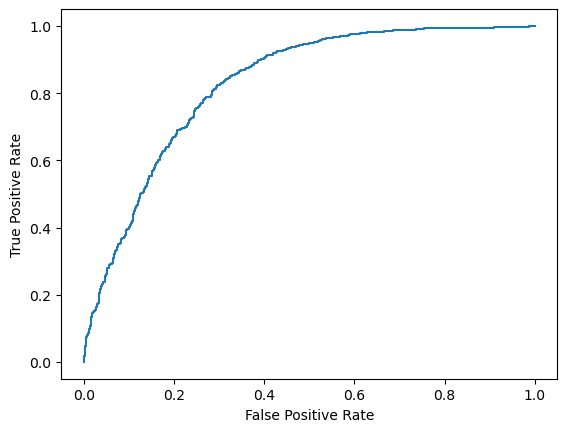

In [556]:
fpr, tpr, thresholds = roc_curve(y_test, post)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [557]:
auc(fpr, tpr)

0.827224

In [558]:
fpr

array([0.   , 0.   , 0.   , 0.001, 0.001, 0.002, 0.002, 0.003, 0.003,
       0.004, 0.004, 0.005, 0.005, 0.006, 0.006, 0.007, 0.007, 0.008,
       0.008, 0.009, 0.009, 0.011, 0.011, 0.012, 0.012, 0.012, 0.012,
       0.013, 0.013, 0.014, 0.014, 0.015, 0.015, 0.016, 0.016, 0.017,
       0.017, 0.018, 0.018, 0.019, 0.019, 0.022, 0.022, 0.024, 0.024,
       0.025, 0.025, 0.026, 0.026, 0.027, 0.027, 0.028, 0.028, 0.031,
       0.031, 0.032, 0.032, 0.034, 0.034, 0.035, 0.035, 0.036, 0.036,
       0.038, 0.038, 0.039, 0.039, 0.042, 0.042, 0.043, 0.043, 0.046,
       0.046, 0.047, 0.047, 0.048, 0.048, 0.049, 0.049, 0.05 , 0.05 ,
       0.051, 0.051, 0.053, 0.053, 0.055, 0.055, 0.056, 0.056, 0.057,
       0.057, 0.058, 0.058, 0.062, 0.062, 0.063, 0.063, 0.064, 0.064,
       0.065, 0.065, 0.066, 0.066, 0.067, 0.067, 0.068, 0.068, 0.069,
       0.069, 0.07 , 0.07 , 0.072, 0.072, 0.073, 0.073, 0.074, 0.074,
       0.075, 0.075, 0.076, 0.076, 0.08 , 0.08 , 0.082, 0.082, 0.083,
       0.083, 0.085,